In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))


# from src.config.setup import SetupConfig
from src.data_workflow.create_tables.create_tables import retrieve_all_table_data

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Retrieve Data Integrated
view_di = retrieve_all_table_data('view_data_integration')

# Dimensiones Dataset
print(f'Dimensiones Dataset: {view_di.shape=}')

Dimensiones Dataset: view_di.shape=(1016193, 30)


In [3]:
view_di.head(3)

,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,GRAVEDAD,...,ESTADO,FECHA_NACIMIENTO,EDAD,GENERO,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,CLASE_DE_VEHICULO,TIPO_DE_SERVICIO,MODALIDAD,ENFUGA
0,A0874471,384402,2011-02-12 19:00:00,21:00:00,2011,FEBRERO,DOMINGO,2011-02-13 16:00:00,AV AVENIDA CIUDAD DE CALI-CL 6 02,SOLO DANOS,...,ILESO,1948-05-23 19:00:00,62.0,MASCULINO,N,1975-01-01 01:00:00,AUTOMOVIL,PARTICULAR,None,N
1,A0874754,384458,2011-02-13 19:00:00,08:20:00,2011,FEBRERO,LUNES,2011-02-14 03:20:00,CL 76-KR9 02,SOLO DANOS,...,ILESO,1961-03-02 19:00:00,49.0,MASCULINO,N,1975-01-01 01:00:00,BUS,PUBLICO,MIXTO,N
2,A0876279,385865,2011-02-28 19:00:00,13:30:00,2011,MARZO,MARTES,2011-03-01 08:30:00,AK 9-CL 115 02,CON HERIDOS,...,ILESO,1974-01-09 19:00:00,37.0,MASCULINO,N,1975-01-01 01:00:00,CAMIONETA,PARTICULAR,None,N


In [137]:
# Excluir Variables que no aportan al modelo: Códigos
cod_variables = ['FORMULARIO', 'CODIGO_ACCIDENTE', 'CODIGO_ACCIDENTADO', 'CODIGO_VEHICULO', 'MUERTE_POSTERIOR', 'FECHA_POSTERIOR_MUERTE', 'MUNICIPIO'] # Municipio siempre es Bogotá, fecha y muerte posterior son inconsistentes

# Copy View
view_di_copy = view_di.copy()

# Drop Variables
view_di_copy.drop(columns=cod_variables, inplace=True)

# Llenar Nulos
for column in view_di_copy.columns:
    if view_di_copy[column].dtype == 'object':  # Identifica columnas categóricas
        view_di_copy[column] = view_di_copy[column].fillna('SIN INFORMACION')
    else:  # Para columnas numéricas
        view_di_copy[column] = view_di_copy[column].fillna(-1)


# Corregir Espacios en Blanco Tipo-Servicio
view_di_copy['TIPO_DE_SERVICIO'] = view_di_copy['TIPO_DE_SERVICIO'].str.strip()
        
# Corregir NO IDENTIFICADO
view_di_copy.loc[view_di_copy['CLASE_DE_VEHICULO'] == 'SIN INFORMACION', 'CLASE_DE_VEHICULO'] = 'NO IDENTIFICADO'

# Excluir Localidades sin información (Menos del 1%)
view_di_copy = view_di_copy[view_di_copy['LOCALIDAD'] != 'SIN INFORMACION']

# Excluir registros sin información del GENERO (Menos del 2%)
view_di_copy = view_di_copy[view_di_copy['GENERO'] != 'SIN INFORMACION']

# Excluir registros sin información de la GRAVEDAD del accidente (Menos del 0.01%)
view_di_copy = view_di_copy[view_di_copy['GRAVEDAD'] != 'SIN INFORMACION'].reset_index(drop=True)

# Excluir registros sin información de la CONDICION_ACCIDENTADO (Menos del 0.01%)
view_di_copy = view_di_copy[view_di_copy['CONDICION_ACCIDENTADO'] != 'SIN INFORMACION'].reset_index(drop=True)


print(f'Dimensiones Dataset: {view_di_copy.shape=}')

Dimensiones Dataset: view_di_copy.shape=(997922, 23)


#### **Análisis Exploratorio**

In [138]:
view_di_copy.head(3)

,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,GRAVEDAD,TIPO_CAUSA,nroinfracciones,...,LONGITUD,CONDICION_ACCIDENTADO,ESTADO,FECHA_NACIMIENTO,EDAD,GENERO,CLASE_DE_VEHICULO,TIPO_DE_SERVICIO,MODALIDAD,ENFUGA
0,2011-02-12 19:00:00,21:00:00,2011,FEBRERO,DOMINGO,2011-02-13 16:00:00,AV AVENIDA CIUDAD DE CALI-CL 6 02,SOLO DANOS,CONDUCTOR,1.0,...,-74.156199,CONDUCTOR,ILESO,1948-05-23 19:00:00,62.0,MASCULINO,AUTOMOVIL,PARTICULAR,SIN INFORMACION,N
1,2011-02-13 19:00:00,08:20:00,2011,FEBRERO,LUNES,2011-02-14 03:20:00,CL 76-KR9 02,SOLO DANOS,CONDUCTOR,1.0,...,-74.054429,CONDUCTOR,ILESO,1961-03-02 19:00:00,49.0,MASCULINO,BUS,PUBLICO,MIXTO,N
2,2011-02-28 19:00:00,13:30:00,2011,MARZO,MARTES,2011-03-01 08:30:00,AK 9-CL 115 02,CON HERIDOS,CONDUCTOR,1.0,...,-74.034876,CONDUCTOR,ILESO,1974-01-09 19:00:00,37.0,MASCULINO,CAMIONETA,PARTICULAR,SIN INFORMACION,N


In [139]:
view_di_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997922 entries, 0 to 997921
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FECHA_OCURRENCIA_ACC   997922 non-null  datetime64[ns]
 1   HORA_OCURRENCIA_ACC    997922 non-null  object        
 2   ANO_OCURRENCIA_ACC     997922 non-null  int64         
 3   MES_OCURRENCIA_ACC     997922 non-null  object        
 4   DIA_OCURRENCIA_ACC     997922 non-null  object        
 5   FECHA_HORA_ACC         997922 non-null  datetime64[ns]
 6   DIRECCION              997922 non-null  object        
 7   GRAVEDAD               997922 non-null  object        
 8   TIPO_CAUSA             997922 non-null  object        
 9   nroinfracciones        997922 non-null  float64       
 10  CLASE_ACC              997922 non-null  object        
 11  LOCALIDAD              997922 non-null  object        
 12  LATITUD                997922 non-null  floa

**Resumen Estadístico**

In [140]:
# Resumen básico
view_di_copy.describe().round(0)

,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,FECHA_HORA_ACC,nroinfracciones,LATITUD,LONGITUD,EDAD
count,997922,997922.0,997922,997922.0,997922.0,997922.0,997922.0
mean,2015-05-29 21:38:22.232038400,2015.0,2015-05-30 10:57:32.942754304,0.0,5.0,-74.0,37.0
min,2002-05-02 19:00:00,2002.0,2002-05-03 11:15:00,-1.0,4.0,-74.0,-7624.0
25%,2011-06-18 19:00:00,2011.0,2011-06-19 08:45:00,-1.0,5.0,-74.0,27.0
50%,2015-08-01 19:00:00,2015.0,2015-08-02 04:40:00,1.0,5.0,-74.0,35.0
75%,2019-04-10 19:00:00,2019.0,2019-04-11 07:10:00,1.0,5.0,-74.0,46.0
max,2024-03-02 19:00:00,2024.0,2024-03-03 13:45:00,3.0,5.0,-74.0,2008.0
std,NaN,5.0,NaN,1.0,0.0,0.0,22.0


**Análisis Univariado**

In [141]:
def print_frequency(freq_var):
    """
    """
    # Suma Total freq
    ttal_freq = freq_var.sum()

    print("\nFrecuencia formateada:")
    print("{:<20} {:<15} {}".format("Categoría", "Frecuencia", "Participación"))

    # Print freq
    for label, freq in freq_var.items():
        part = (freq / ttal_freq) * 100
        print("{:<20} {:<15} {:.2f}%".format(label, freq, part))


def plot_frequency(data: pd.DataFrame, 
                categorical_variable: str,
                figsize: tuple,
                color: str,
                rotation: int):
    """
    """
    # Calculate Frequency
    freq_var = data[categorical_variable].value_counts()

    # Print Frequency
    print_frequency(freq_var)

    # Create Plot
    plt.figure(figsize=figsize)

    freq_var.plot(kind='bar', color=color)
    plt.title(f'Distribución de {categorical_variable.upper()}')
    plt.xlabel(f'{categorical_variable.capitalize()}')
    plt.ylabel(f'Frequency')
    plt.xticks(rotation=rotation)

    # Show plot
    plt.show()


Frecuencia formateada:
Categoría            Frecuencia      Participación
MASCULINO            830599          83.23%
FEMENINO             167323          16.77%


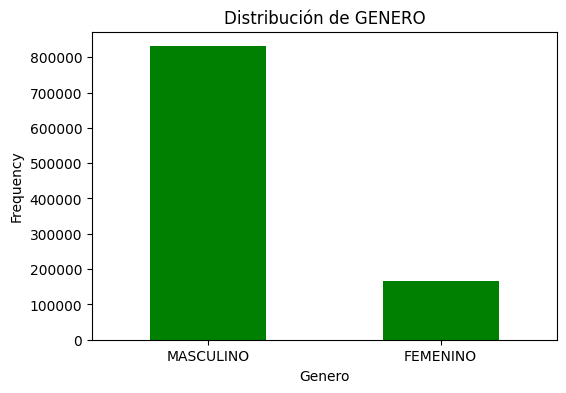

In [142]:
# Frecuencia Género
plot_frequency(view_di_copy, 'GENERO', (6, 4), 'green', 0)


Frecuencia formateada:
Categoría            Frecuencia      Participación
SOLO DANOS           592582          59.38%
CON HERIDOS          388055          38.89%
CON MUERTOS          17285           1.73%


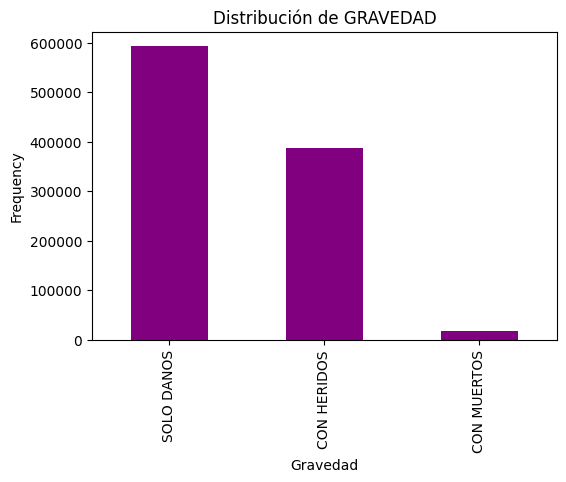

In [143]:
# Frecuencias: Gravedad
plot_frequency(view_di_copy, 'GRAVEDAD', (6, 4), 'purple', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
AUTOMOVIL            381243          38.20%
MOTOCICLETA          142673          14.30%
CAMIONETA            115670          11.59%
BUS                  90362           9.06%
NO IDENTIFICADO      65617           6.58%
CAMION, FURGON       51865           5.20%
CAMPERO              39162           3.92%
MICROBUS             34165           3.42%
BICICLETA            27923           2.80%
BUSETA               22522           2.26%
TRACTOCAMION         12293           1.23%
VOLQUETA             8613            0.86%
BUS ARTICULADO       2205            0.22%
BUS ALIMENTADOR      1500            0.15%
OTRO                 669             0.07%
MOTOCICLO            442             0.04%
TRACCION ANIMAL      355             0.04%
MOTOCARRO            245             0.02%
M. INDUSTRIAL        146             0.01%
BICITAXI             94              0.01%
M. AGRICOLA          84              0.01%
CUATRIMOTO         

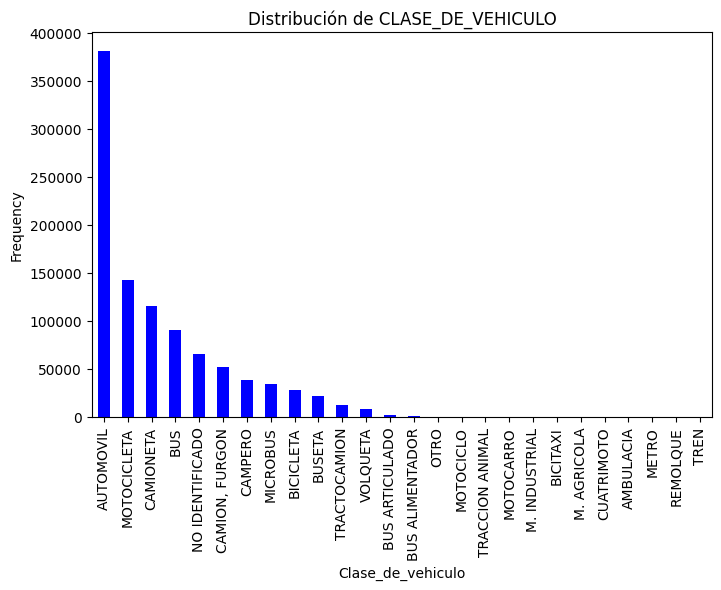

In [144]:
# Frecuencias: Clase de Vehiculo
plot_frequency(view_di_copy, 'CLASE_DE_VEHICULO', (8, 5), 'blue', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
PARTICULAR           514771          51.58%
PUBLICO              374214          37.50%
SIN INFORMACION      86955           8.71%
OFICIAL              20939           2.10%
DIPLOMATICO          1043            0.10%


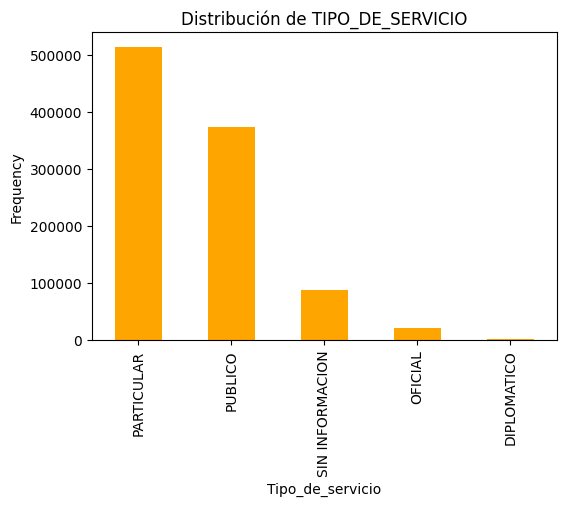

In [145]:
# Frecuencias: TIPO_DE_SERVICIO
plot_frequency(view_di_copy, 'TIPO_DE_SERVICIO', (6, 4), 'orange', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
CHOQUE               845913          84.77%
ATROPELLO            109872          11.01%
CAIDA DE OCUPANTE    21610           2.17%
VOLCAMIENTO          9767            0.98%
OTRO                 8185            0.82%
AUTOLESION           2248            0.23%
SIN INFORMACION      264             0.03%
INCENDIO             63              0.01%


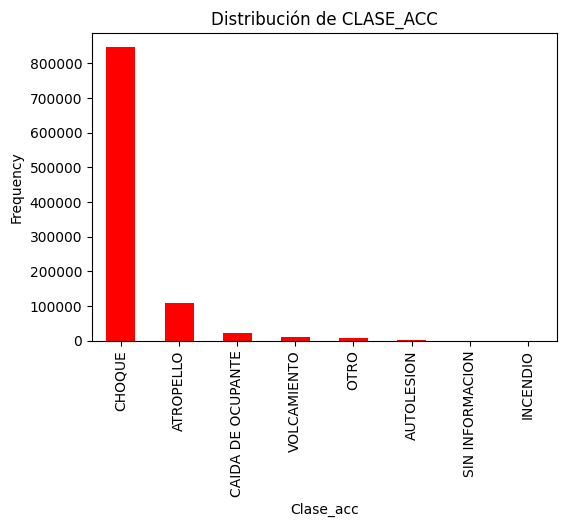

In [146]:
# Frecuencias: CLASE_ACC
plot_frequency(view_di_copy, 'CLASE_ACC', (6, 4), 'red', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
CONDUCTOR            729713          71.81%
MOTOCICLISTA         124815          12.28%
PASAJERO             71304           7.02%
PEATON               63329           6.23%
CICLISTA             26928           2.65%
SIN INFORMACION      104             0.01%


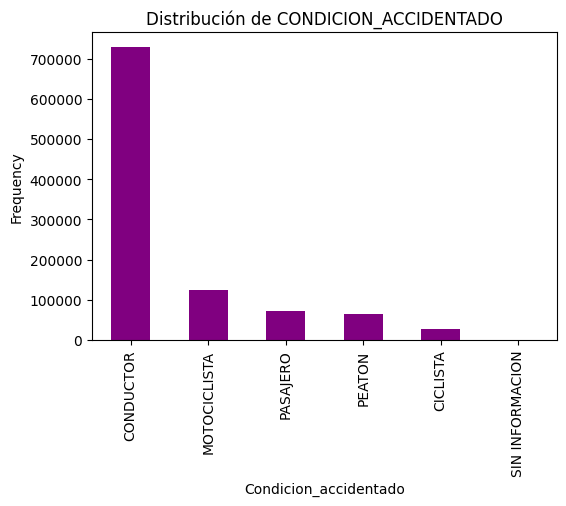

In [14]:
# Frecuencias: CONDICION_ACCIDENTADO
plot_frequency(view_di_copy, 'CONDICION_ACCIDENTADO', (6, 4), 'purple', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
KENNEDY              119048          11.72%
ENGATIVA             107573          10.59%
SUBA                 101347          9.97%
USAQUEN              98679           9.71%
FONTIBON             77809           7.66%
PUENTE ARANDA        73192           7.20%
CHAPINERO            67277           6.62%
TEUSAQUILLO          55893           5.50%
BARRIOS UNIDOS       53543           5.27%
BOSA                 42345           4.17%
CIUDAD BOLIVAR       37919           3.73%
LOS MARTIRES         34209           3.37%
SANTA FE             28763           2.83%
RAFAEL URIBE URIBE   27010           2.66%
SAN CRISTOBAL        25134           2.47%
TUNJUELITO           24866           2.45%
USME                 18242           1.80%
ANTONIO NARINO       18198           1.79%
CANDELARIA           5023            0.49%
SIN INFORMACION      108             0.01%
SUMAPAZ              15              0.00%


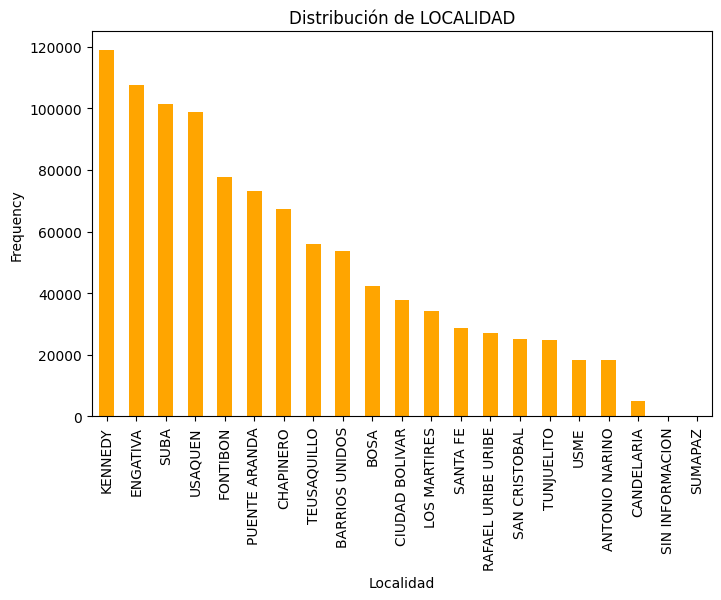

In [15]:
# Frecuencias: LOCALIDAD
plot_frequency(view_di_copy, 'LOCALIDAD', (8, 5), 'orange', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
CONDUCTOR            614152          60.44%
SIN INFORMACION      359757          35.40%
PEATON               40482           3.98%
PASAJERO             1802            0.18%


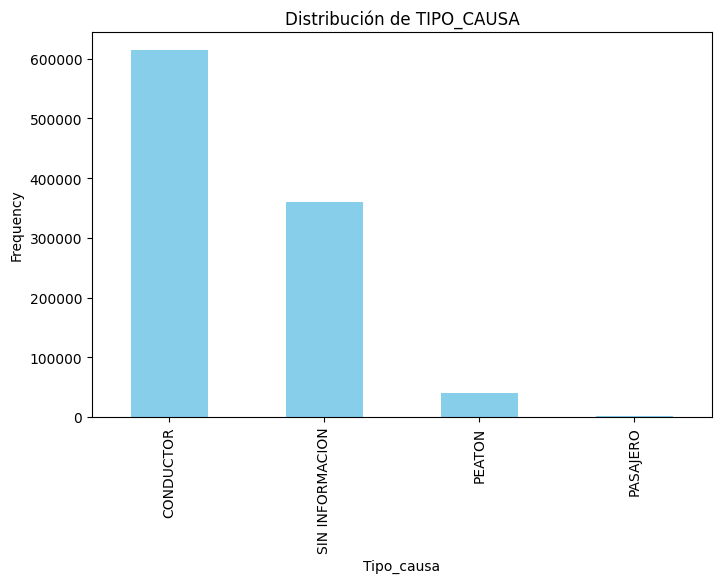

In [16]:
# Frecuencias: TIPO_CAUSA
plot_frequency(view_di_copy, 'TIPO_CAUSA', (8, 5), 'skyblue', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
SIN INFORMACION      691016          68.00%
PASAJEROS - INDIVIDUAL 70729           6.96%
CARGA - EXTRAPESADA  50365           4.96%
PASAJEROS - ESPECIAL ESCOLAR 41783           4.11%
PASAJEROS - MASIVO   40236           3.96%
MIXTO                39479           3.88%
CARGA-PESADA         37083           3.65%
PASAJEROS - COLECTIVO 28842           2.84%
CARGA - EXTRADIMENSIONADA 8675            0.85%
PASAJEROS - ESPECIAL TURISMO 4956            0.49%
PASAJEROS - ESPECIAL OCASIONAL 1633            0.16%
PASAJEROS - ESPECIAL ASALARIAD 1271            0.13%
CARGA - MERCANCIA PELIGROSA 125             0.01%


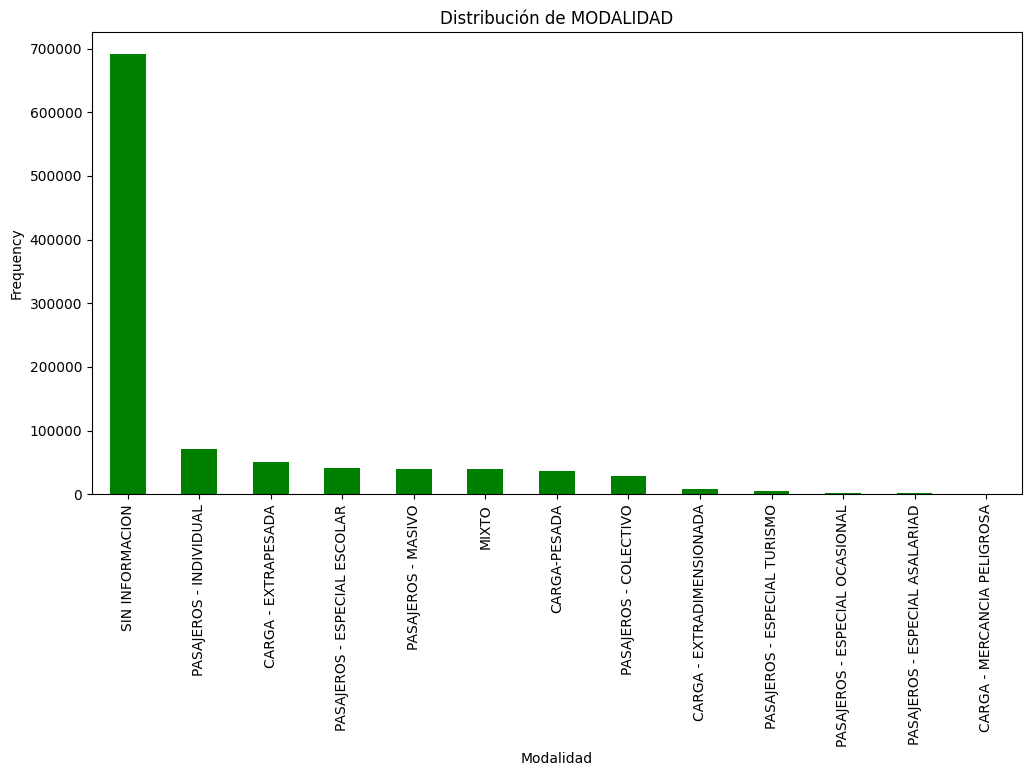

In [17]:
# Frecuencia Modalidad
plot_frequency(view_di_copy, 'MODALIDAD', (12, 6), 'green', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
N                    850552          83.70%
SIN INFORMACION      155280          15.28%
S                    10361           1.02%


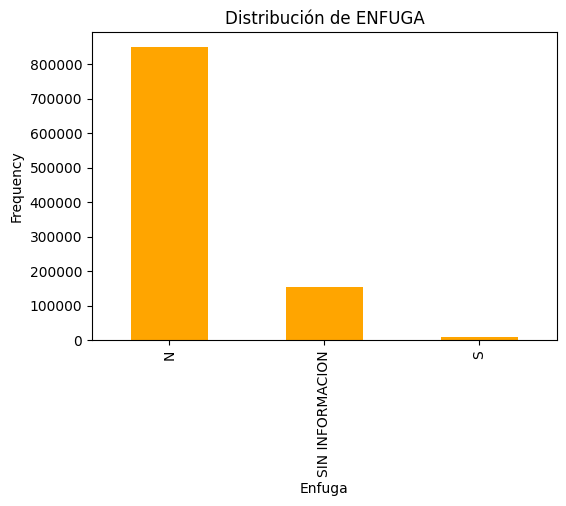

In [18]:
# Frecuencias: ENFUGA
plot_frequency(view_di_copy, 'ENFUGA', (6, 4), 'orange', 90)

In [19]:
# Histograma Edad
view_di_copy['EDAD'].describe().round(0)

count    1016193.0
mean          37.0
std           23.0
min        -7624.0
25%           26.0
50%           35.0
75%           46.0
max         2021.0
Name: EDAD, dtype: float64

In [20]:
# Quitar edades irregulares
view_di_copy = view_di_copy[(view_di_copy['EDAD'] > 0) & (view_di_copy['EDAD'] < 120)].reset_index(drop=True)

view_di_copy['EDAD'].describe().round(0)

count    997025.0
mean         37.0
std          14.0
min           1.0
25%          27.0
50%          35.0
75%          46.0
max         119.0
Name: EDAD, dtype: float64

In [21]:
# Nro Infracciones
view_di_copy['nroinfracciones'].describe().round(0)

count    997025.0
mean          0.0
std           1.0
min          -1.0
25%          -1.0
50%           1.0
75%           1.0
max           3.0
Name: nroinfracciones, dtype: float64


Frecuencia formateada:
Categoría            Frecuencia      Participación
VIERNES              160342          16.08%
SABADO               154821          15.53%
MARTES               152458          15.29%
MIERCOLES            148014          14.85%
JUEVES               145432          14.59%
LUNES                134471          13.49%
DOMINGO              101487          10.18%


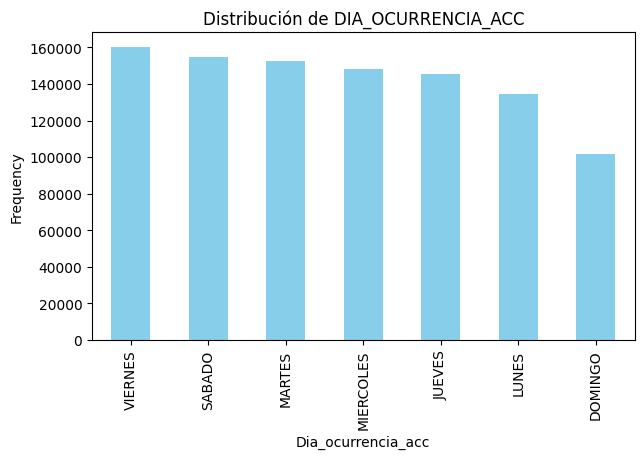

In [22]:
# Frecuencias: Dias Ocurrencia Accidente
plot_frequency(view_di_copy, 'DIA_OCURRENCIA_ACC', (7, 4), 'skyblue', 90)

In [30]:
# Frecuencias: Mes de Ocurrencia
view_di_copy['MES_OCURRENCIA_ACC'].unique()

array(['FEBRERO', 'MARZO', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO',
       'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'ENERO', 'DICIEMBRE',
       'ABRIL'], dtype=object)

**Variable Objetivo: ESTADO**


Frecuencia formateada:
Categoría            Frecuencia      Participación
ILESO                741176          74.34%
HERIDO               248193          24.89%
MUERTO               7656            0.77%


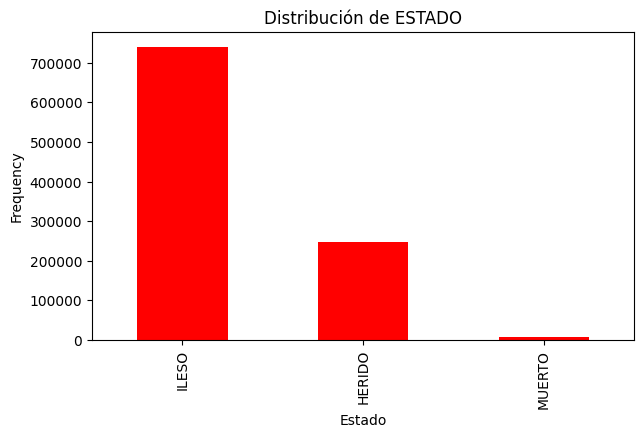

In [23]:
# Frecuencias: ESTADO
plot_frequency(view_di_copy, 'ESTADO', (7, 4), 'red', 90)

#### Modelado de Datos

In [208]:
view_di_model = view_di_copy.copy()

# Hora Format
view_di_model['HORA_OCURRENCIA_ACC'] = pd.to_datetime(view_di_model['HORA_OCURRENCIA_ACC'], format='%H:%M:%S').dt.time

**Excluir Localidades Sin Información**

In [209]:
# Excluir Localidades sin Información
view_di_model = view_di_model[(view_di_model['LOCALIDAD'] != 'SIN INFORMACION')].reset_index(drop=True)

**Imputar Tipo Causa**

In [210]:
# Tipo Causa
view_di_model.loc[view_di_model['TIPO_CAUSA'] == 'SIN INFORMACION', 'TIPO_CAUSA'] = 'VEHICULO-VIA'

# Nro Infracciones
view_di_model.loc[view_di_model['nroinfracciones'] == -1, 'nroinfracciones'] = 0

In [211]:
view_di_model['TIPO_CAUSA'].value_counts()

TIPO_CAUSA
CONDUCTOR       601596
VEHICULO-VIA    354658
PEATON           39882
PASAJERO          1786
Name: count, dtype: int64

**Excluir Variables**

In [212]:
# En fuga solo tiene un 1% de datos relevantes, y modalidad más del 70% de datos faltantes.
view_di_model.drop(columns=['ENFUGA', 'MODALIDAD', 'DIRECCION', 'FECHA_HORA_ACC'], inplace=True)

**Categorizar Parte del Día**

In [213]:
# Agregar Partes del día
def categorizar_parte_del_dia(data: pd.DataFrame):
    """
    """
    import numpy as np

    # Condiciones
    condiciones = [
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('06:00:00').time()),
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('12:00:00').time()),
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('18:00:00').time()),
    ]

    # Etiquetas para cada condición
    labels = ['MADRUGADA', 'MANANA', 'TARDE']

    # Aplicar la categorización
    array_labels = np.select(condiciones, labels, default='NOCHE')

    return array_labels


# Agregar Parte
view_di_model['PARTE_DEL_DIA'] = categorizar_parte_del_dia(view_di_model)

# Drop Hora Ocurrencia
view_di_model.drop(columns=['HORA_OCURRENCIA_ACC'], inplace=True)

**Mapeo de Vehiculos**

In [214]:
mapeo_vehiculos = {
    'AUTOMOVIL': 'VEHICULOS PERSONALES',
    'MOTOCICLETA': 'VEHICULOS PERSONALES',
    'CAMPERO': 'VEHICULOS PERSONALES',
    'BICICLETA': 'VEHICULOS PERSONALES',
    'CUATRIMOTO': 'VEHICULOS PERSONALES',
    'CAMIONETA': 'VEHICULOS COMERCIALES',
    'CAMION, FURGON': 'VEHICULOS COMERCIALES',
    'TRACTOCAMION': 'VEHICULOS COMERCIALES',
    'VOLQUETA': 'VEHICULOS COMERCIALES',
    'MOTOCARRO': 'VEHICULOS COMERCIALES',
    'M. INDUSTRIAL': 'VEHICULOS COMERCIALES',
    'M. AGRICOLA': 'VEHICULOS COMERCIALES',
    'REMOLQUE': 'VEHICULOS COMERCIALES',
    'BUS': 'TRANSPORTE PUBLICO',
    'MICROBUS': 'TRANSPORTE PUBLICO',
    'BUSETA': 'TRANSPORTE PUBLICO',
    'BUS ARTICULADO': 'TRANSPORTE PUBLICO',
    'BUS ALIMENTADOR': 'TRANSPORTE PUBLICO',
    'METRO': 'TRANSPORTE PUBLICO',
    'TREN': 'TRANSPORTE PUBLICO',
    'NO IDENTIFICADO': 'OTROS',
    'OTRO': 'OTROS',
    'TRACCION ANIMAL': 'OTROS',
    'BICITAXI': 'OTROS',
    'AMBULANCIA': 'OTROS'
}

# Aplicar el mapeo al DataFrame
view_di_model['CLASE_DE_VEHICULO'] = view_di_model['CLASE_DE_VEHICULO'].map(mapeo_vehiculos)

**Mapeo Tipo Servicio**

In [215]:
mapeo_categorias = {
    'PARTICULAR': 'PARTICULAR',
    'PUBLICO': 'PUBLICO',
    'SIN INFORMACION': 'OTRO',
    'OFICIAL': 'OTRO',
    'DIPLOMATICO': 'OTRO'
}

# Aplicar el mapeo al DataFrame
view_di_model['TIPO_DE_SERVICIO'] = view_di_model['TIPO_DE_SERVICIO'].map(mapeo_categorias)

**Excluir Últimas Fechas**

In [216]:
view_di_model.drop(columns=['FECHA_OCURRENCIA_ACC', 'FECHA_NACIMIENTO'], inplace=True)

In [217]:
print(f'Dimensiones Dataset Model: {view_di_model.shape=}')
view_di_model.head(3)

Dimensiones Dataset Model: view_di_model.shape=(997922, 17)


,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,GRAVEDAD,TIPO_CAUSA,nroinfracciones,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD,CONDICION_ACCIDENTADO,ESTADO,EDAD,GENERO,CLASE_DE_VEHICULO,TIPO_DE_SERVICIO,PARTE_DEL_DIA
0,2011,FEBRERO,DOMINGO,SOLO DANOS,CONDUCTOR,1.0,CHOQUE,KENNEDY,4.640961,-74.156199,CONDUCTOR,ILESO,62.0,MASCULINO,VEHICULOS PERSONALES,PARTICULAR,NOCHE
1,2011,FEBRERO,LUNES,SOLO DANOS,CONDUCTOR,1.0,CHOQUE,CHAPINERO,4.659842,-74.054429,CONDUCTOR,ILESO,49.0,MASCULINO,TRANSPORTE PUBLICO,PUBLICO,MANANA
2,2011,MARZO,MARTES,CON HERIDOS,CONDUCTOR,1.0,ATROPELLO,USAQUEN,4.693240,-74.034876,CONDUCTOR,ILESO,37.0,MASCULINO,VEHICULOS COMERCIALES,PARTICULAR,TARDE


**Entrenar Modelo**

In [218]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [219]:
# Codificar la variable objetivo con Label Encoding
label_encoder = LabelEncoder()
view_di_model['ESTADO'] = label_encoder.fit_transform(view_di_model['ESTADO'])

# Setear Genero
view_di_model['GENERO'] = view_di_model['GENERO'].map({'MASCULINO': 1, 'FEMENINO': 0})

# Transformador de columna para aplicar transformaciones específicas a cada tipo de características
categorical_features = view_di_model.select_dtypes(include=['object', 'category']).columns
numerical_features = ['LATITUD', 'LONGITUD', 'EDAD', 'nroinfracciones']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Preprocesar las características
X = preprocessor.fit_transform(view_di_model.drop('ESTADO', axis=1))
y = view_di_model['ESTADO']


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [223]:
# Entrenar el modelo XGBoost
model = xgb.XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     37400
           1       0.96      0.98      0.97    111116
           2       0.84      0.91      0.87      1173

    accuracy                           0.96    149689
   macro avg       0.91      0.92      0.92    149689
weighted avg       0.96      0.96      0.96    149689



In [228]:
# Evaluar el modelo
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))

              precision    recall  f1-score   support

      HERIDO       0.94      0.88      0.91     37400
       ILESO       0.96      0.98      0.97    111116
      MUERTO       0.84      0.91      0.87      1173

    accuracy                           0.96    149689
   macro avg       0.91      0.92      0.92    149689
weighted avg       0.96      0.96      0.96    149689

